This is a task to get the information in FITS image, which is commonly used in astronomy

In [6]:
import os
import numpy as np

from astropy.io.fits import getdata
from astropy import wcs
from astropy.io import fits
from astropy import units as u
from astropy import constants as con
from astropy.coordinates import SkyCoord

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [24]:
def plot_spectra(
                 freq_array      = np.array([]), 
                 intensity_array = np.array([]),
                 figsize         = (6,4),
                 xlabel        = 'Frequency [GHz]'    , xlabel_size = 12, xscale = 'linear',
                 ylabel        = 'Intensity [Jy/beam]', ylabel_size = 12, yscale = 'linear',
                 datalabel     = 'TBD',
                 fontsize      = 12, 
                 plot_ticks     = True,
                     xtick_size = 12, ytick_size = 12,
                 outPDF_filename = 'none',
                 verbose = False
                  ):
       
        
    if verbose == True:
        print('Plotting 1D spectra')
            
  
    # Initializing figure
    fig = plt.figure(  figsize = (figsize[0], figsize[1])  )
    ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])
        
    # Set the x/y axis title and legend
    plt.xlabel(xlabel, size = xlabel_size)
    plt.ylabel(ylabel, size = ylabel_size)

    # set plot scale
    plt.xscale(xscale)
    plt.yscale(yscale)
        
    # set label fontsizes
    plt.rc('font', size = fontsize)            # controls default text sizes
    plt.rc('xtick', labelsize = xtick_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize = ytick_size)    # fontsize of the tick labels
    if (plot_ticks != True):
        fig.axis_labels.hide_x()
        fig.axis_labels.hide_y()
        fig.tick_labels.hide_x()
        fig.tick_labels.hide_y()

    # plot the data
    plt.plot(freq_array, intensity_array,
             '-', # symbol shape
             color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
             linewidth = 2.0, 
             label = datalabel
                )
                    
    # Setting the figure legend 
    plt.legend(loc=1, fontsize = fontsize)

In [25]:
# Open FITS image cube
fitsimage = "/home/tcc/DATA/GC_Dspecies/ancillary/H29alpha_7m+12m_natural.image.fits"

# transform FITS to HDU
Ihdu = fits.open(fitsimage)

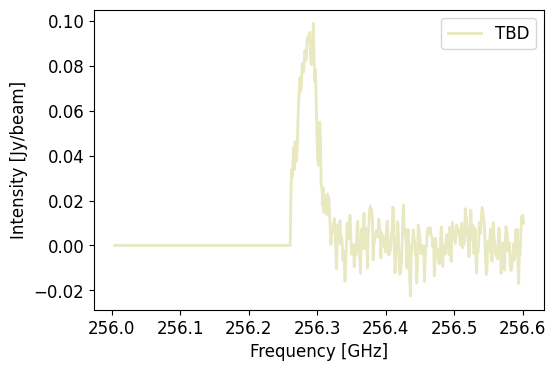

In [29]:
naxis1 = Ihdu[0].header['naxis1']
naxis2 = Ihdu[0].header['naxis2']
naxis3 = Ihdu[0].header['naxis3']

crpix3 = Ihdu[0].header['crpix3']
cdelt3 = Ihdu[0].header['cdelt3']
crval3 = Ihdu[0].header['crval3']


freq_array = np.zeros( naxis3 )
freq_array = crval3 + ( np.arange(naxis3) + 1 - crpix3 ) * cdelt3

ypix = 523
xpix = 425
intensity_array = Ihdu[0].data[0][:, ypix, xpix]

plot_spectra(freq_array/1e9, intensity_array)

0.0072449087


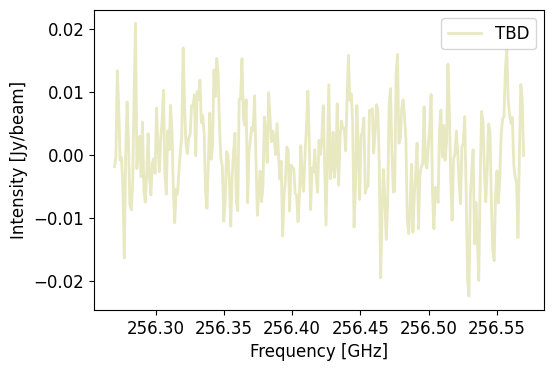

In [43]:
## Calculate the standard deviation

freqGHz_start = 256.57
freqGHz_end   = 256.27

freq_startpix = round( ( freqGHz_start*1e9 - crval3 )/ cdelt3 + crpix3 )
freq_endpix   = round( ( freqGHz_end  *1e9 - crval3 )/ cdelt3 + crpix3 )

#print(freq_startpix, freq_endpix)

plot_spectra( freq_array[freq_startpix:freq_endpix]/1e9, intensity_array[freq_startpix:freq_endpix])


## calculate the standard deviation as measurement errors (y_err)
std = np.std(intensity_array[freq_startpix:freq_endpix])
print(std)


## Follow <https://splatalogue.online//> to get rest frequency

In [ ]:
# https://splatalogue.online//`
CI_restfreq = 492.16065100          # GHz
HCOplus3to2_restfreq = 267.55762590 # GHz

## To open the pixel failed to fit 1d gaussian

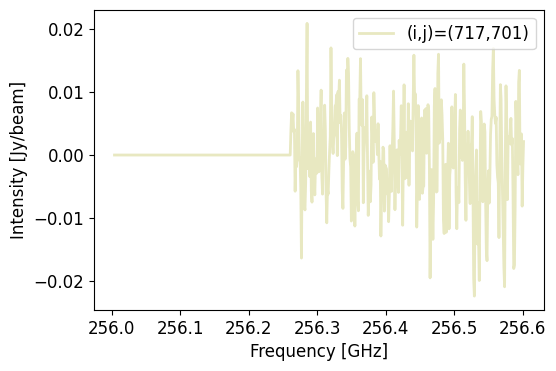

In [42]:
freq_array = np.zeros( naxis3 )
freq_array = crval3 + ( np.arange(naxis3) + 1 - crpix3 ) * cdelt3

xpix = 717
ypix = 701
intensity_array = Ihdu[0].data[0][:,ypix, xpix]
plot_spectra(freq_array/1e9, intensity_array, datalabel = f'(i,j)=({xpix},{ypix})')
